# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [7]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [8]:
hist[4]

0

The `Values` method returns the values:

In [9]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [10]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [11]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

No handles with labels found to put in legend.


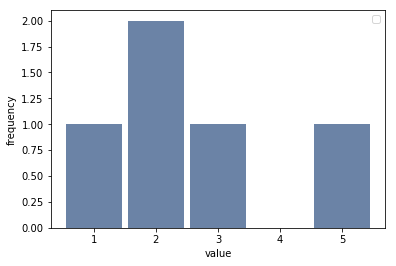

In [12]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [13]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

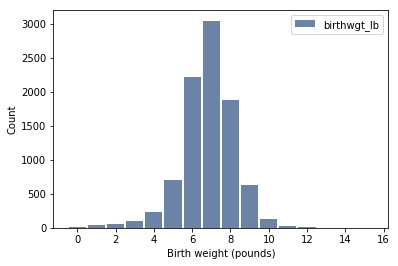

In [14]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [15]:
ages = np.floor(live.agepreg)

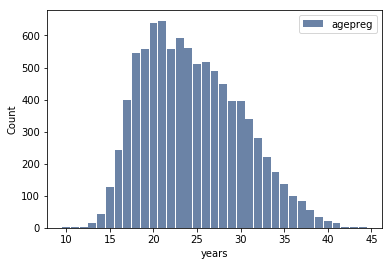

In [16]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

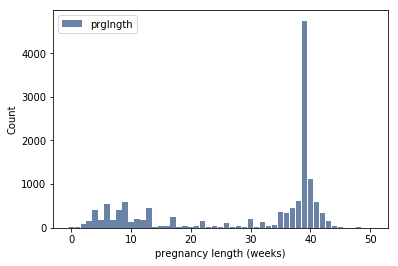

In [17]:
# Solution goes here
hist_prglngth = thinkstats2.Hist(preg['prglngth'], label='prglngth')
thinkplot.Hist(hist_prglngth)
thinkplot.Config(xlabel='pregnancy length (weeks)', ylabel='Count')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

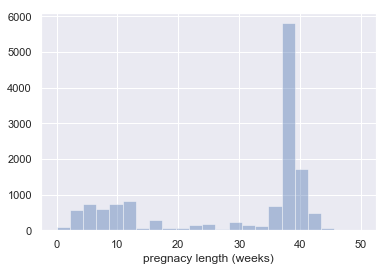

In [19]:
# solution again but using seaborn
sns.distplot(a=preg['prglngth'], axlabel='pregnacy length (weeks)', kde=False);

`Hist` provides smallest, which select the lowest values and their frequencies.

In [20]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [21]:
# Solution goes here
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

44.0 1
43.0 1
42.0 2
41.0 14
40.0 21
39.0 34
38.0 55
37.0 83
36.0 99
35.0 138


From live births, we can selection first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [22]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

In [23]:
print('Sample size\nNumber of first babies: {}\nNumber of non-first: {}'.format(len(firsts), len(others)))

Sample size
Number of first babies: 4413
Number of non-first: 4735


We can use `width` and `align` to plot two histograms side-by-side.

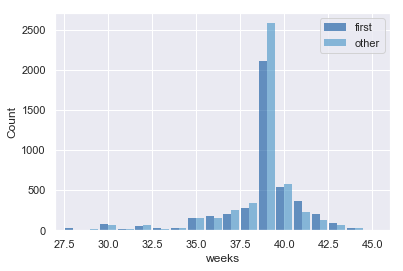

In [24]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

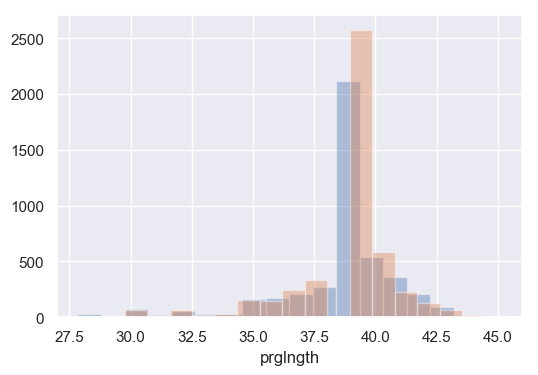

In [25]:
plt.figure(dpi=100)
sns.distplot(firsts['prglngth'], kde=False)
sns.distplot(others['prglngth'], kde=False)
plt.xlim((27, 46))
plt.show()

`Series` provides methods to compute summary statistics:

In [26]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [27]:
mean, std

(38.56055968517709, 2.702343810070587)

As an exercise, confirm that `std` is the square root of `var`:

In [28]:
# Solution goes here
np.equal(std, np.sqrt(var))

True

Here's are the mean pregnancy lengths for first babies and others:

In [29]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [30]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [31]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [32]:
# Solution goes here
CohenEffectSize(firsts['prglngth'], others['prglngth'])

0.028879044654449834

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [33]:
# Solution goes here
print("Means of first and other birth weight (lbs): {:2f}, {:2f}".format(firsts['totalwgt_lb'].mean(), others['totalwgt_lb'].mean()))

Means of first and other birth weight (lbs): 7.201094, 7.325856


In [34]:
# Solution goes here
"""
The difference in means between the two groups is 0.089 standard deviations, or ~53% of the others weigh more than
first babies,which is small. This, however, is larger than what we saw for pregnacy length.
"""
CohenEffectSize(firsts['totalwgt_lb'], others['totalwgt_lb'])

-0.08867292707260174

For the next few exercises, we'll load the respondent file:

In [35]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

In [36]:
resp['totincr']

0        9
1       10
2        5
3       13
4        6
5        7
6        6
7       12
8        6
9       12
10       9
11      13
12       7
13       8
14       6
15       9
16       5
17       2
18       9
19       4
20      12
21      12
22       8
23      13
24      10
25       6
26      11
27       2
28      11
29       9
        ..
7613    13
7614     7
7615    14
7616     4
7617    12
7618     8
7619    14
7620     8
7621    11
7622    14
7623    14
7624    12
7625    14
7626     2
7627     3
7628    14
7629     4
7630     5
7631     1
7632     6
7633     9
7634     5
7635     8
7636     3
7637     8
7638    14
7639    14
7640    10
7641    13
7642    11
Name: totincr, Length: 7643, dtype: int64

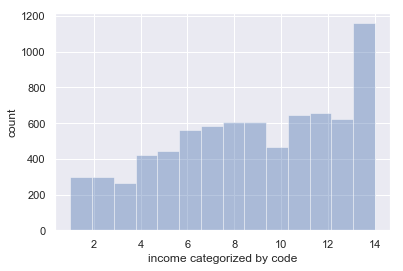

In [37]:
# Solution goes here
sns.distplot(kde=False, a=resp['totincr'], bins=14)
plt.xlabel('income categorized by code')
plt.ylabel('count')
plt.show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

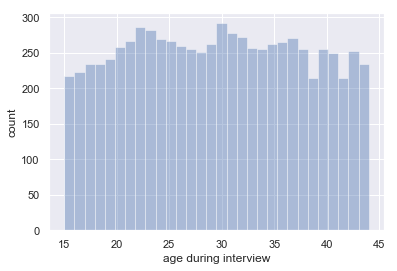

In [38]:
# Solution goes here
# 30 years between youngest and oldest respondent
sns.distplot(kde=False, a=resp['age_r'], bins=30)
plt.xlabel('age during interview')
plt.ylabel('count')
plt.show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

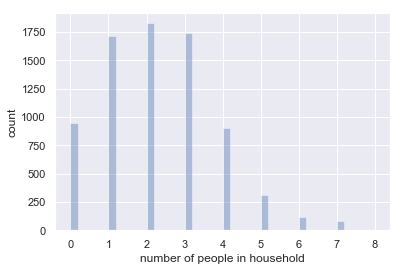

In [39]:
# Solution goes here
sns.distplot(kde=False, a=resp['numfmhh'])
plt.xlabel('number of people in household')
plt.ylabel('count')
plt.show()

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

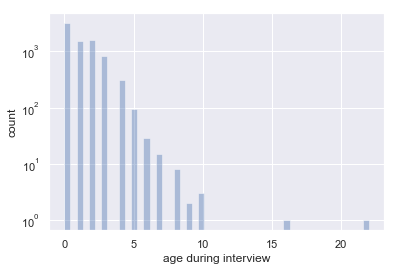

In [40]:
# Solution goes here
sns.distplot(kde=False, a=resp['parity'], hist_kws={'log':True})
plt.xlabel('age during interview')
plt.ylabel('count')
plt.show()

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [41]:
# Solution goes here
resp['parity'].nlargest(resp['parity'].size).value_counts().sort_values()

22       1
16       1
9        2
10       3
8        8
7       15
6       29
5       95
4      309
3      828
1     1519
2     1603
0     3230
Name: parity, dtype: int64

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

number of respondents in highest income level: 1160


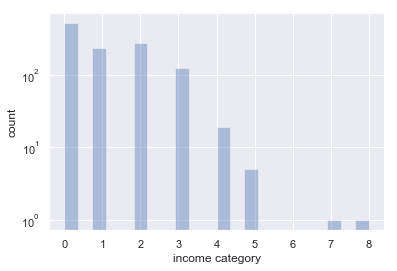

In [42]:
# Solution goes here
income_level_14 = resp['totincr'].where(resp['totincr'] == 14).dropna()
parity_level_14 = resp['parity'][income_level_14.index]
print('number of respondents in highest income level: {}'.format(income_level_14.size))

sns.distplot(parity_level_14, kde=False, hist_kws={'log':True})
plt.xlabel('income category')
plt.ylabel('count')
plt.show()

Find the largest parities for high income respondents.

In [43]:
# Solution goes here
parity_level_14.nlargest(parity_level_14.size).value_counts().sort_values()

8      1
7      1
5      5
4     19
3    123
1    229
2    267
0    515
Name: parity, dtype: int64

Compare the mean <tt>parity</tt> for high income respondents and others.

In [44]:
resp[resp['totincr'] < 14]['parity'].mean()

1.2495758136665125

In [45]:
# Solution goes here

print('Mean parity for highest income respondent: {:2f}\nMean parity for remaining respondents: {:2f}'.format(
    parity_level_14.mean(), resp[resp['totincr'] < 14]['parity'].mean())) 

Mean parity for highest income respondent: 1.075862
Mean parity for remaining respondents: 1.249576


Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [46]:
# Solution goes here
"""
The effect size between the highest income group and anyone below group is 0.125 standard deviations, or there's a
~55% for a family with lower income group to have more babies. This is a larger size effect than what was seen for
pregnancy length for first babies and others.
"""
CohenEffectSize(parity_level_14, resp[resp['totincr'] < 14]['parity'])

-0.12511855314660367